# Обучение с учителем

### Задание 1

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [94]:
# Импортируйте библиотеки pandas и numpy
import pandas as pd
import numpy as np

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Импортируем все необходимое для обучения, предсказания и оценки качества предсказания
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [97]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn
boston = load_boston()

In [98]:
# Создайте датафреймы X и y из этих данных
# Датафрейм с признаками недвижимости
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# Датафрейм с целевой переменой - цена на недвижимость
y = pd.DataFrame(boston.target, columns=['price'])

In [99]:
# Выведем первые записи датафрейма с признаками
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [100]:
# Выведем информацию о датафрейме с признаками, проверим есть ли пропуски 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [101]:
# Выведем первые записи датафрейма с ценой
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [102]:
# Выведем также информацию и о датафрейме с ценой
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [103]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split 
# так, чтобы размер тестовой выборки составлял 30% от всех данных, и random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model
lr = LinearRegression()

In [105]:
# Обучите модель на тренировочных данных (используйте все признаки) 
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
# Cделайте предсказание на тестовых
y_pred = lr.predict(X_test)

In [107]:
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics
lr_score = r2_score(y_test, y_pred)
lr_score

0.7112260057484908

### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [108]:
# Импортируем необходимую модель
from sklearn.ensemble import RandomForestRegressor

In [109]:
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble
# n_estimators = 1000, max_depth = 12 и random_state = 42
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [110]:
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, 
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0]
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [111]:
# Сделайте предсказание на тестовых данных
y_pred = model.predict(X_test)

In [112]:
# Посчитайте R2
rf_score = r2_score(y_test, y_pred)
rf_score

0.87472606157312

In [113]:
# Сравните с результатом из предыдущего задания
print(f'LinearRegression R^2 = {lr_score}')
print(f'RandomForest R^2 = {rf_score}')

LinearRegression R^2 = 0.7112260057484908
RandomForest R^2 = 0.87472606157312


Видно, что оценка $R^2$ для модели RandomForest получилась выше, чем для модели линейной регрессии, то есть для этой задачи модель RandomForest работает лучше.

### Задание 3

Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [114]:
# Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_
?RandomForestRegressor

In [115]:
# Выведем список показателей важности
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [116]:
# С помощью этого атрибута feature_importances_ найдите сумму всех показателей важности
model.feature_importances_.sum()

1.0

In [117]:
# Выведем названия признаков
model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [118]:
# Сгенерируем словарь {название признака: важность}
feat_name_to_importance = {name: importance for name, importance in zip(model.feature_names_in_, model.feature_importances_)}
feat_name_to_importance

{'CRIM': 0.03167574073875602,
 'ZN': 0.0015425166262328857,
 'INDUS': 0.007138131415845557,
 'CHAS': 0.0012362448947738866,
 'NOX': 0.0142689698753483,
 'RM': 0.4026817857034993,
 'AGE': 0.014298644996729816,
 'DIS': 0.06397256527230023,
 'RAD': 0.00528121831288784,
 'TAX': 0.011524934553144586,
 'PTRATIO': 0.018081076405025417,
 'B': 0.012450853014007697,
 'LSTAT': 0.4158473181914483}

In [119]:
# Выведем список пар ключ-значение словаря feat_name_to_importance, отсортированный по убыванию важности
sorted(feat_name_to_importance.items(), key=lambda feat: feat[1], reverse=True)

[('LSTAT', 0.4158473181914483),
 ('RM', 0.4026817857034993),
 ('DIS', 0.06397256527230023),
 ('CRIM', 0.03167574073875602),
 ('PTRATIO', 0.018081076405025417),
 ('AGE', 0.014298644996729816),
 ('NOX', 0.0142689698753483),
 ('B', 0.012450853014007697),
 ('TAX', 0.011524934553144586),
 ('INDUS', 0.007138131415845557),
 ('RAD', 0.00528121831288784),
 ('ZN', 0.0015425166262328857),
 ('CHAS', 0.0012362448947738866)]

Видно, что двумя наиболее важными признаками являются LSTAT и RM.

LSTAT - % lower status of the population

RM - average number of rooms per dwelling

### Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации - будем определять, какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества
относительно редки), так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель. Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df. С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков. Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y. У вас должны получиться объекты X_train, X_test, y_train и y_test. Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

parameters = [{'n_estimators': [10, 15],

'max_features': np.arange(3, 5),

'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:

estimator=RandomForestClassifier(random_state=100),

param_grid=parameters,

scoring='roc_auc',

cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом, полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [120]:
# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split (уже импортирован)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [121]:
# Загрузите датасет creditcard.csv и создайте датафрейм df
df = pd.read_csv('creditcard.csv')

In [122]:
# Выведем первые строки загруженного датафрейма
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [123]:
# С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [124]:
# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков
# Видно, что пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [125]:
# Применим настройку, чтобы можно было просматривать все столбцы датафрейма
pd.options.display.max_columns = 100
# Просмотрите первые 10 строк датафрейма df
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [126]:
# Создайте датафрейм X из датафрейма df, исключив столбец Class
X = df.drop('Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [127]:
# Создайте объект Series под названием y из столбца Class
y = df.Class
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [128]:
# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, 
# используя аргументы: test_size = 0.3, random_state = 100, stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [129]:
# У вас должны получиться объекты X_train, X_test, y_train и y_test. Просмотрите информацию о их форме
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [130]:
# Сетка параметров, по которой будет происходить поиск
parameters = {
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7),
}

In [131]:
# Создайте модель GridSearchCV со следующими аргументами:
# estimator = RandomForestClassifier(random_state=100), param_grid = parameters, scoring = 'roc_auc', cv = 3
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

In [132]:
# Обучите модель на тренировочном наборе данных
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

In [133]:
# Просмотрите параметры лучшей модели с помощью атрибута best_params_
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [134]:
# Предсказание вероятности на тестовых данных
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

In [135]:
# Предсказание вероятности на тренировочных данных
y_pred_proba_train = clf.predict_proba(X_train)
y_pred_proba_train = y_pred_proba_train[:, 1]

In [136]:
# Вычислите AUC на тестовых данных и сравните с результатом, полученным на тренировочных данных
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [137]:
# AUC на тренировочных данных
roc_auc_score(y_train, y_pred_proba_train)

0.9703527882554751

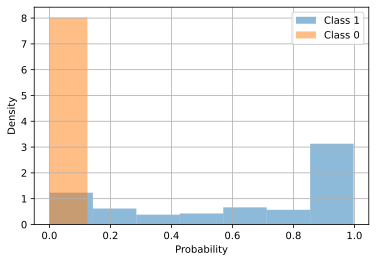

In [138]:
# Чтобы сравнить отобразим гистограмму
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.hist(y_pred_proba[y_test == 1], bins=7, density=True, label='Class 1', alpha=0.5)
plt.hist(y_pred_proba[y_test == 0], bins=7, density=True, label='Class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.grid()
plt.legend()
plt.show()

# Дополнительные задания

### Задание 1

Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [139]:
from sklearn.datasets import load_wine

In [140]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Задание 2

Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [141]:
# Тип данных объекта data
type(data)

sklearn.utils.Bunch

In [142]:
# Список из ключей объекта data
data_keys = list(data.keys())
data_keys

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

### Задание 3

Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [143]:
# Данные объекта data
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [144]:
# Названия признаков датасета
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [145]:
# Описание датасета
for line in data.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Задание 4

Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [146]:
# Названия классов целевой переменной
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [147]:
# Количество классов целевой переменной
data.target_names.size

3

### Задание 5

На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [148]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Задание 6

Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [150]:
# Размер созданного датафрейма
X.shape

(178, 13)

In [151]:
# Проверим, есть ли пропущенные значения
# Видно, что нет
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### Задание 7

Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [152]:
X['target'] = data.target
X['target'] = X['target'].astype(np.int64)

In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [154]:
X.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Задание 8

Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [155]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


### Задание 9

Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [156]:
high_corr = list(X_corr[np.abs(X_corr.target) > 0.5].drop('target', axis=0).index)
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Задание 10

Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.

Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [157]:
# Удаляем из датафрейма X поле с целевой переменной
X.drop('target', axis=1, inplace=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [158]:
# Добавляем поля с возведенными в квадрат значениями
for name in X.columns:
    if name in high_corr:
        X[name + '_2'] = X[name] * X[name]
    
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0


In [159]:
# Выводим описание полей датафрейма
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06


In [160]:
# Выведем еще информацию о полях датафрейма
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   alcohol                         178 non-null    float64
 1   malic_acid                      178 non-null    float64
 2   ash                             178 non-null    float64
 3   alcalinity_of_ash               178 non-null    float64
 4   magnesium                       178 non-null    float64
 5   total_phenols                   178 non-null    float64
 6   flavanoids                      178 non-null    float64
 7   nonflavanoid_phenols            178 non-null    float64
 8   proanthocyanins                 178 non-null    float64
 9   color_intensity                 178 non-null    float64
 10  hue                             178 non-null    float64
 11  od280/od315_of_diluted_wines    178 non-null    float64
 12  proline                         178 